# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
!pip install requests beautifulsoup4



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Jaime\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
!pip install chardet


^C



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Jaime\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [9]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [10]:
sinasc_raw_copy = sinasc_raw.copy

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [11]:
lat = pd.cut(sinasc_raw['munResLat'], [-13, -10.5, -8])

In [12]:
lat

0        (-13.0, -10.5]
1        (-13.0, -10.5]
2        (-13.0, -10.5]
3        (-13.0, -10.5]
4        (-13.0, -10.5]
              ...      
27023    (-13.0, -10.5]
27024    (-13.0, -10.5]
27025    (-13.0, -10.5]
27026    (-13.0, -10.5]
27027    (-13.0, -10.5]
Name: munResLat, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(-13.0, -10.5] < (-10.5, -8.0]]

In [13]:
sinasc_raw.pivot_table(
    values=['CODOCUPMAE'],
    index=['munResLat', lat],
    columns=['CONSULTAS'],
    aggfunc={np.sum, np.min, np.mean, np.max, np.median, np.std, np.var},
    fill_value=0)

CODOCUPMAE                                           
                               amax                                    amin   
CONSULTAS                         1       2       3       4       9       1   
munResLat munResLat                                                           
-13.49976 (-13.0, -10.5]          0       0       0       0       0       0  \
          (-10.5, -8.0]           0       0       0       0       0       0   
-13.47656 (-13.0, -10.5]          0       0       0       0       0       0   
          (-10.5, -8.0]           0       0       0       0       0       0   
-13.19503 (-13.0, -10.5]          0       0       0       0       0       0   
...                             ...     ...     ...     ...     ...     ...   
-9.19187  (-10.5, -8.0]      999994  999992  999992  999992       0  999992   
-8.78502  (-13.0, -10.5]          0       0       0       0       0       0   
          (-10.5, -8.0]      999994  999992  999994  999994  999992  351505   
-8.76889  (-13.0, -10.5]          0       0       0       0       0       0   
          (-10.5, -8.0]      999994  999994  999994  999994  999994   21210   

                                                          ...              
                                                          ...        sum   
CONSULTAS                      2       3       4       9  ...          1   
munResLat munResLat                                       ...              
-13.49976 (-13.0, -10.5]       0       0       0       0  ...          0  \
          (-10.5, -8.0]        0       0       0       0  ...          0   
-13.47656 (-13.0, -10.5]       0       0       0       0  ...          0   
          (-10.5, -8.0]        0       0       0       0  ...          0   
-13.19503 (-13.0, -10.5]       0       0       0       0  ...          0   
...                          ...     ...     ...     ...  ...        ...   
-9.19187  (-10.5, -8.0]   999992  223405  123115       0  ...    4999962   
-8.78502  (-13.0, -10.5]       0       0       0       0  ...          0   
          (-10.5, -8.0]   354705  239415  141410  999992  ...   18027309   
-8.76889  (-13.0, -10.5]       0       0       0       0  ...          0   
          (-10.5, -8.0]   141410   21210   10205  223605  ...  417146556   

                                                                        
                                                                        
CONSULTAS                         2           3           4         9   
munResLat munResLat                                                     
-13.49976 (-13.0, -10.5]          0           0           0         0  \
          (-10.5, -8.0]           0           0           0         0   
-13.47656 (-13.0, -10.5]          0           0           0         0   
          (-10.5, -8.0]           0           0           0         0   
-13.19503 (-13.0, -10.5]          0           0           0         0   
...                             ...         ...         ...       ...   
-9.19187  (-10.5, -8.0]      999992     7970674    68239355         0   
-8.78502  (-13.0, -10.5]          0           0           0         0   
          (-10.5, -8.0]    16492725    64845446   162377262   1999984   
-8.76889  (-13.0, -10.5]          0           0           0         0   
          (-10.5, -8.0]   544029694  1867748720  3151878461  26137312   

                                                                     
                                   var                               
CONSULTAS                            1             2             3   
munResLat munResLat                                                  
-13.49976 (-13.0, -10.5]  0.000000e+00  0.000000e+00  0.000000e+00  \
          (-10.5, -8.0]   0.000000e+00  0.000000e+00  0.000000e+00   
-13.47656 (-13.0, -10.5]  0.000000e+00  0.000000e+00  0.000000e+00   
          (-10.5, -8.0]   0.000000e+00  0.000000e+00  0.000000e+00   
-13.19503 (-13.0, -10.5]  0.000000e+00  0.

In [ ]:
sinasc_raw.pivot_table(
    values=['QTDGESTANT'],
    index=['munResLat', lat],
    columns=['CONSULTAS'],
    aggfunc={np.sum, np.min, np.mean, np.max, np.median, np.std, np.var},
    fill_value=0)

QTDGESTANT                                  ...        
                               amax                amin              ...  sum   
CONSULTAS                         1   2   3   4  9    1  2  3  4  9  ...    1   
munResLat munResLat                                                  ...        
-13.49976 (-13.0, -10.5]          0   0   0   0  0    0  0  0  0  0  ...    0  \
          (-10.5, -8.0]           0   0   0   0  0    0  0  0  0  0  ...    0   
-13.47656 (-13.0, -10.5]          0   0   0   0  0    0  0  0  0  0  ...    0   
          (-10.5, -8.0]           0   0   0   0  0    0  0  0  0  0  ...    0   
-13.19503 (-13.0, -10.5]          0   0   0   0  0    0  0  0  0  0  ...    0   
...                             ...  ..  ..  .. ..  ... .. .. .. ..  ...  ...   
-9.19187  (-10.5, -8.0]           3   2   4  52  0    0  2  0  0  0  ...   10   
-8.78502  (-13.0, -10.5]          0   0   0   0  0    0  0  0  0  0  ...    0   
          (-10.5, -8.0]           9   6   7   7  2    0  0  0  0  0  ...   69   
-8.76889  (-13.0, -10.5]          0   0   0   0  0    0  0  0  0  0  ...    0   
          (-10.5, -8.0]          12  14  13  12  7    0  0  0  0  0  ...  887   

                                                                               
                                                     var                       
CONSULTAS                    2     3     4   9         1         2         3   
munResLat munResLat                                                            
-13.49976 (-13.0, -10.5]     0     0     0   0  0.000000  0.000000  0.000000  \
          (-10.5, -8.0]      0     0     0   0  0.000000  0.000000  0.000000   
-13.47656 (-13.0, -10.5]     0     0     0   0  0.000000  0.000000  0.000000   
          (-10.5, -8.0]      0     0     0   0  0.000000  0.000000  0.000000   
-13.19503 (-13.0, -10.5]     0     0     0   0  0.000000  0.000000  0.000000   
...                        ...   ...   ...  ..       ...       ...       ...   
-9.19187  (-10.5, -8.0]      2    22   185   0  1.071429  0.000000  2.177778   
-8.78502  (-13.0, -10.5]     0     0     0   0  0.000000  0.000000  0.000000   
          (-10.5, -8.0]     47   115   286   2  7.853261  3.290476  2.779147   
-8.76889  (-13.0, -10.5]     0     0     0   0  0.000000  0.000000  0.000000   
          (-10.5, -8.0]   1058  3300  5449  45  2.753889  2.940085  2.256429   

                                               
                                               
CONSULTAS                         4         9  
munResLat munResLat                            
-13.49976 (-13.0, -10.5]   0.000000  0.000000  
          (-10.5, -8.0]    0.000000  0.000000  
-13.47656 (-13.0, -10.5]   0.000000  0.000000  
          (-10.5, -8.0]    0.000000  0.000000  
-13.19503 (-13.0, -10.5]   0.000000  0.000000  
...                             ...       ...  
-9.19187  (-10.5, -8.0]   34.044715  0.000000  
-8.78502  (-13.0, -10.5]   0.000000  0.000000  
          (-10.5, -8.0]    2.141819  2.000000  
-8.76889  (-13.0, -10.5]   0.000000  0.000000  
          (-10.5, -8.0]    1.748812  2.322581  

[104 rows x 35 columns]

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [14]:
area = pd.cut(sinasc_raw['munResArea'], [0, 3000, 1000000])

In [15]:

sinasc_raw.pivot_table(
    values=['CODOCUPMAE'],
    index=['munResArea', area],
    columns=['CONSULTAS'],
    aggfunc={np.sum, np.min, np.mean, np.max, np.median, np.std, np.var},
    fill_value=0)

CODOCUPMAE                                           
                                 amax                                    amin   
CONSULTAS                           1       2       3       4       9       1   
munResArea munResArea                                                           
459.978    (0, 3000]                0  999992  999992  999992       0       0  \
           (3000, 1000000]          0       0       0       0       0       0   
541.647    (0, 3000]           512120       0  999994  999994       0  512120   
           (3000, 1000000]          0       0       0       0       0       0   
605.692    (0, 3000]                0       0  239415  999992       0       0   
...                               ...     ...     ...     ...     ...     ...   
11518.915  (3000, 1000000]     999992  999992  999993  999994  999992  223505   
24855.724  (0, 3000]                0       0       0       0       0       0   
           (3000, 1000000]     999992  999992  999992  999992       0  354705   
34096.394  (0, 3000]                0       0       0       0       0       0   
           (3000, 1000000]     999994  999994  999994  999994  999994   21210   

                                                            ...              
                                                            ...        sum   
CONSULTAS                        2       3       4       9  ...          1   
munResArea munResArea                                       ...              
459.978    (0, 3000]        999992  322205  141410       0  ...          0  \
           (3000, 1000000]       0       0       0       0  ...          0   
541.647    (0, 3000]             0  239415  253115       0  ...     512120   
           (3000, 1000000]       0       0       0       0  ...          0   
605.692    (0, 3000]             0  239415  241005       0  ...          0   
...                            ...     ...     ...     ...  ...        ...   
11518.915  (3000, 1000000]  142115   21205   21205  142105  ...   11218993   
24855.724  (0, 3000]             0       0       0       0  ...          0   
           (3000, 1000000]  351105  223710  142105       0  ...   35316947   
34096.394  (0, 3000]             0       0       0       0  ...          0   
           (3000, 1000000]  141410   21210   10205  223605  ...  417146556   

                                                                          
                                                                          
CONSULTAS                           2           3           4         9   
munResArea munResArea                                                     
459.978    (0, 3000]           999992     2322189    43826896         0  \
           (3000, 1000000]          0           0           0         0   
541.647    (0, 3000]                0     5111995    19560636         0   
           (3000, 1000000]          0           0           0         0   
605.692    (0, 3000]                0      239415     8683974         0   
...                               ...         ...         ...       ...   
11518.915  (3000, 1000000]   38970710   167111358   843779524   3393591   
24855.724  (0, 3000]                0           0           0         0   
           (3000, 1000000]  113306504   244026702   232961181         0   
34096.394  (0, 3000]                0           0           0         0   
           (3000, 1000000]  544029694  1867748720  3151878461  26137312   

                                                                       
                                     var                               
CONSULTAS                              1             2             3   
munResArea munResArea                                                  
459.978    (0, 3000]        0.000000e+00  0.000000e+00  1.531317e+11  \
           (3000, 1000000]  0.000000e+00  0.000000e+00  0.000000e+00   
541.647    (0, 3000]        0.000000e+00  0.000000e+00  1.288331e+11   
          

In [ ]:
sinasc_raw.pivot_table(
    values=['QTDFILVIVO'],
    index=['munResArea', area],
    columns=['CONSULTAS'],
    aggfunc={np.sum, np.min, np.mean, np.max, np.median, np.std, np.var},
    fill_value=0)

QTDFILVIVO                                  ...   
                                 amax                amin              ...   
CONSULTAS                           1   2   3   4  9    1  2  3  4  9  ...   
munResArea munResArea                                                  ...   
459.978    (0, 3000]                3   6   2   3  0    3  6  1  0  0  ...  \
           (3000, 1000000]          0   0   0   0  0    0  0  0  0  0  ...   
541.647    (0, 3000]                1   0   5   2  0    1  0  0  0  0  ...   
           (3000, 1000000]          0   0   0   0  0    0  0  0  0  0  ...   
605.692    (0, 3000]                0   0   4   3  0    0  0  0  0  0  ...   
...                               ...  ..  ..  .. ..  ... .. .. .. ..  ...   
11518.915  (3000, 1000000]          3   6   4  10  2    0  0  0  0  0  ...   
24855.724  (0, 3000]                0   0   0   0  0    0  0  0  0  0  ...   
           (3000, 1000000]         10  11   8  10  1    0  0  0  0  1  ...   
34096.394  (0, 3000]                0   0   0   0  0    0  0  0  0  0  ...   
           (3000, 1000000]         12   9  12   8  6    0  0  0  0  0  ...   

                                                                           
                            sum                            var             
CONSULTAS                     1    2     3     4   9         1         2   
munResArea munResArea                                                      
459.978    (0, 3000]          3    6     5    41   0  0.000000  0.000000  \
           (3000, 1000000]    0    0     0     0   0  0.000000  0.000000   
541.647    (0, 3000]          1    0    15    25   0  0.000000  0.000000   
           (3000, 1000000]    0    0     0     0   0  0.000000  0.000000   
605.692    (0, 3000]          0    0     9    38   0  0.000000  0.000000   
...                         ...  ...   ...   ...  ..       ...       ...   
11518.915  (3000, 1000000]   11   67   245  1127   4  0.950549  1.581825   
24855.724  (0, 3000]          0    0     0     0   0  0.000000  0.000000   
           (3000, 1000000]   82  262   480   362   1  4.466312  3.840305   
34096.394  (0, 3000]          0    0     0     0   0  0.000000  0.000000   
           (3000, 1000000]  723  845  2701  4236  38  2.102530  2.109997   

                                                          
                                                          
CONSULTAS                          3         4         9  
munResArea munResArea                                     
459.978    (0, 3000]        0.333333  0.526008  0.000000  
           (3000, 1000000]  0.000000  0.000000  0.000000  
541.647    (0, 3000]        2.277778  0.493902  0.000000  
           (3000, 1000000]  0.000000  0.000000  0.000000  
605.692    (0, 3000]        2.700000  0.625397  0.000000  
...                              ...       ...       ...  
11518.915  (3000, 1000000]  1.058191  1.015138  1.066667  
24855.724  (0, 3000]        0.000000  0.000000  0.000000  
           (3000, 1000000]  3.035172  1.847162  0.000000  
34096.394  (0, 3000]        0.000000  0.000000  0.000000  
           (3000, 1000000]  1.629423  1.216511  1.713978  

[104 rows x 35 columns]

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [16]:
alti = pd.qcut(sinasc_raw['munResAlt'], 2)

In [17]:
sinasc_raw.pivot_table(
    values=['QTDFILMORT'],
    index=['munResAlt', alti],
    columns=['CONSULTAS'],
    aggfunc={np.sum, np.min, np.mean, np.max, np.median, np.std, np.var},
    fill_value=0)

QTDFILMORT                                ...        
                                amax              amin              ...  sum   
CONSULTAS                          1  2  3   4  9    1  2  3  4  9  ...    1   
munResAlt munResAlt                                                 ...        
85.0      (84.999, 153.0]          1  1  2   5  1    0  0  0  0  0  ...    7  \
          (153.0, 595.0]           0  0  0   0  0    0  0  0  0  0  ...    0   
87.0      (84.999, 153.0]          6  9  6   8  1    0  0  0  0  0  ...  174   
          (153.0, 595.0]           0  0  0   0  0    0  0  0  0  0  ...    0   
99.0      (84.999, 153.0]          2  0  2   2  0    0  0  0  0  0  ...    2   
...                              ... .. ..  .. ..  ... .. .. .. ..  ...  ...   
397.0     (153.0, 595.0]           0  0  1   3  0    0  0  0  0  0  ...    0   
419.0     (84.999, 153.0]          0  0  0   0  0    0  0  0  0  0  ...    0   
          (153.0, 595.0]           3  2  2   2  0    0  0  0  0  0  ...    4   
595.0     (84.999, 153.0]          0  0  0   0  0    0  0  0  0  0  ...    0   
          (153.0, 595.0]           1  2  4  28  0    0  0  0  0  0  ...    4   

                                                                             
                                                   var                       
CONSULTAS                    2    3     4  9         1         2         3   
munResAlt munResAlt                                                          
85.0      (84.999, 153.0]    7   15    61  1  0.221344  0.233333  0.195423  \
          (153.0, 595.0]     0    0     0  0  0.000000  0.000000  0.000000   
87.0      (84.999, 153.0]  203  603  1204  7  0.456705  0.597948  0.375304   
          (153.0, 595.0]     0    0     0  0  0.000000  0.000000  0.000000   
99.0      (84.999, 153.0]    0    3    22  0  0.500000  0.000000  0.455556   
...                        ...  ...   ... ..       ...       ...       ...   
397.0     (153.0, 595.0]     0    4    23  0  0.000000  0.000000  0.168421   
419.0     (84.999, 153.0]    0    0     0  0  0.000000  0.000000  0.000000   
          (153.0, 595.0]     4   11    36  0  2.333333  0.527778  0.280672   
595.0     (84.999, 153.0]    0    0     0  0  0.000000  0.000000  0.000000   
          (153.0, 595.0]    17   56   321  0  0.219780  0.381222  0.341028   

                                               
                                               
CONSULTAS                         4         9  
munResAlt munResAlt                            
85.0      (84.999, 153.0]  0.435789  0.500000  
          (153.0, 595.0]   0.000000  0.000000  
87.0      (84.999, 153.0]  0.405922  0.180645  
          (153.0, 595.0]   0.000000  0.000000  
99.0      (84.999, 153.0]  0.254787  0.000000  
...                             ...       ...  
397.0     (153.0, 595.0]   0.236892  0.000000  
419.0     (84.999, 153.0]  0.000000  0.000000  
          (153.0, 595.0]   0.254455  0.000000  
595.0     (84.999, 153.0]  0.000000  0.000000  
          (153.0, 595.0]   0.870175  0.000000  

[98 rows x 35 columns]

In [ ]:

sinasc_raw.pivot_table(
    values=['QTDGESTANT'],
    index=['munResAlt', alti],
    columns=['CONSULTAS'],
    aggfunc={np.sum, np.min, np.mean, np.max, np.median, np.std, np.var},
    fill_value=0)

QTDGESTANT                                  ...   
                                amax                amin              ...   
CONSULTAS                          1   2   3   4  9    1  2  3  4  9  ...   
munResAlt munResAlt                                                   ...   
85.0      (84.999, 153.0]          9   6   7   7  2    0  0  0  0  0  ...  \
          (153.0, 595.0]           0   0   0   0  0    0  0  0  0  0  ...   
87.0      (84.999, 153.0]         12  14  13  12  7    0  0  0  0  0  ...   
          (153.0, 595.0]           0   0   0   0  0    0  0  0  0  0  ...   
99.0      (84.999, 153.0]          3   2   4  52  0    0  2  0  0  0  ...   
...                              ...  ..  ..  .. ..  ... .. .. .. ..  ...   
397.0     (153.0, 595.0]           3   1   5   3  0    1  0  0  0  0  ...   
419.0     (84.999, 153.0]          0   0   0   0  0    0  0  0  0  0  ...   
          (153.0, 595.0]           3   3   5   9  0    0  0  0  0  0  ...   
595.0     (84.999, 153.0]          0   0   0   0  0    0  0  0  0  0  ...   
          (153.0, 595.0]           3   6   5   9  2    0  0  0  0  0  ...   

                                                                           
                           sum                             var             
CONSULTAS                    1     2     3     4   9         1         2   
munResAlt munResAlt                                                        
85.0      (84.999, 153.0]   69    47   115   286   2  7.853261  3.290476  \
          (153.0, 595.0]     0     0     0     0   0  0.000000  0.000000   
87.0      (84.999, 153.0]  887  1058  3300  5449  45  2.753889  2.940085   
          (153.0, 595.0]     0     0     0     0   0  0.000000  0.000000   
99.0      (84.999, 153.0]   10     2    22   185   0  1.071429  0.000000   
...                        ...   ...   ...   ...  ..       ...       ...   
397.0     (153.0, 595.0]     5     2    25   130   0  1.333333  0.333333   
419.0     (84.999, 153.0]    0     0     0     0   0  0.000000  0.000000   
          (153.0, 595.0]     5    10    56   183   0  2.333333  1.111111   
595.0     (84.999, 153.0]    0     0     0     0   0  0.000000  0.000000   
          (153.0, 595.0]    15    84   300  1410   4  0.994505  2.006033   

                                                          
                                                          
CONSULTAS                         3          4         9  
munResAlt munResAlt                                       
85.0      (84.999, 153.0]  2.779147   2.141819  2.000000  
          (153.0, 595.0]   0.000000   0.000000  0.000000  
87.0      (84.999, 153.0]  2.256429   1.748812  2.322581  
          (153.0, 595.0]   0.000000   0.000000  0.000000  
99.0      (84.999, 153.0]  2.177778  34.044715  0.000000  
...                             ...        ...       ...  
397.0     (153.0, 595.0]   2.407895   0.941935  0.000000  
419.0     (84.999, 153.0]  0.000000   0.000000  0.000000  
          (153.0, 595.0]   2.070588   1.677512  0.000000  
595.0     (84.999, 153.0]  0.000000   0.000000  0.000000  
          (153.0, 595.0]   1.543828   1.435571  1.066667  

[98 rows x 35 columns]

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
# URL da página
url = "https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia"

# Lê a tabela diretamente da página usando a função read_html do Pandas
tables = pd.read_html(url, header=0, flavor='bs4')

# Selecione a tabela desejada (nesse caso, a primeira tabela)
table = tables[1]

# Salva os dados em um arquivo CSV
csv_file = 'tabela_rondonia_imediata.csv'
table.to_csv(csv_file, index=False, encoding='utf-8')

print(f'Tabela salva em {csv_file}')

Tabela salva em tabela_rondonia_imediata.csv


In [22]:
dados_ro = pd.read_csv('tabela_rondonia_imediata.csv')
dados_ro
# imediatas = dict(zip(dados_ro['municipio'], dados_ro['regiao']))

,Região geográfica imediata[1],Código,Municípios
0,Porto Velho,110001,Candeias do Jamari
1,Porto Velho,110001,Guajará-Mirim
2,Porto Velho,110001,Itapuã do Oeste
3,Porto Velho,110001,Nova Mamoré
4,Porto Velho,110001,Porto Velho
5,Ariquemes,110002,Alto Paraíso
6,Ariquemes,110002,Ariquemes
7,Ariquemes,110002,Buritis
8,Ariquemes,110002,Cacaulândia
9,Ariquemes,110002,Campo Novo de Rondônia


In [24]:
dados_ro.rename(columns={'Região geográfica imediata[1]': 'regiao', 'Municípios': 'municipio'}, inplace=True)
dados_ro.to_csv('tabela_rondonia_imediata.csv', index=False)


In [26]:
imediatas = dict(zip(dados_ro['municipio'], dados_ro['regiao']))
imediatas 

{'Candeias do Jamari': 'Porto Velho',
 'Guajará-Mirim': 'Porto Velho',
 'Itapuã do Oeste': 'Porto Velho',
 'Nova Mamoré': 'Porto Velho',
 'Porto Velho': 'Porto Velho',
 'Alto Paraíso': 'Ariquemes',
 'Ariquemes': 'Ariquemes',
 'Buritis': 'Ariquemes',
 'Cacaulândia': 'Ariquemes',
 'Campo Novo de Rondônia': 'Ariquemes',
 'Cujubim': 'Ariquemes',
 'Monte Negro': 'Ariquemes',
 'Rio Crespo': 'Ariquemes',
 'Governador Jorge Teixeira': 'Jaru',
 'Jaru': 'Jaru',
 "Machadinho d'Oeste": 'Jaru',
 'Theobroma': 'Jaru',
 'Vale do Anari': 'Jaru'}

In [27]:
sinasc_2 = sinasc_raw[['IDADEMAE', 'munResNome', 'CONSULTAS']]
sinasc_3 = sinasc_2.rename(columns={
    'munResNome': 'municipio'
}).merge(dados_ro, on='municipio', how='outer')
sinasc_3


,IDADEMAE,municipio,CONSULTAS,regiao,Código
0,19.0,Alta Floresta D'Oeste,4.0,NaN,NaN
1,29.0,Alta Floresta D'Oeste,4.0,NaN,NaN
2,37.0,Alta Floresta D'Oeste,4.0,NaN,NaN
3,30.0,Alta Floresta D'Oeste,4.0,NaN,NaN
4,33.0,Alta Floresta D'Oeste,4.0,NaN,NaN
...,...,...,...,...,...
27024,30.0,Cabixi,4.0,NaN,NaN
27025,22.0,Cabixi,4.0,NaN,NaN
27026,32.0,Cabixi,4.0,NaN,NaN
27027,30.0,Cabixi,4.0,NaN,NaN


In [29]:
sinasc_2 = sinasc_raw[['IDADEMAE', 'munResNome']]
graf_idade = sinasc_2.set_index('munResNome').groupby(imediatas).mean()
graf_idade

,IDADEMAE
munResNome,
Ariquemes,25.459635
Jaru,25.805579
Porto Velho,26.166303


<Axes: xlabel='munResNome'>

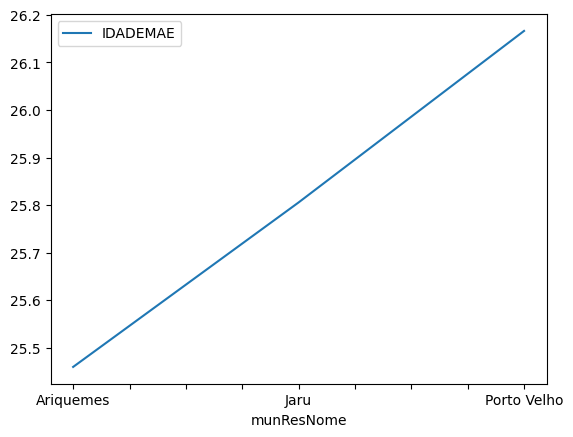

In [30]:
graf_idade.plot()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [37]:
import pandas as pd
from bs4 import BeautifulSoup
# URL da página
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M"

# Lê a tabela diretamente da página usando a função read_html do Pandas
tables = pd.read_html(url, header=0, flavor='bs4')

# Selecione a tabela desejada (nesse caso, a primeira tabela)
table = tables[0]

# Salva os dados em um arquivo CSV
csv_file = 'tabela_rondonia_idh.csv'
table.to_csv(csv_file, index=False, encoding='utf-8')

print(f'Tabela salva em {csv_file}')

Tabela salva em tabela_rondonia_idh.csv


In [39]:
dados_ro_idh = pd.read_csv(csv_file)
dados_ro_idh.head()

,Posição,Município,Dados de 2010,Dados de 2010.1,Dados de 2010.2,Dados de 2010.3
0,Posição,Município,IDH municipal,IDH renda,IDH longevidade,IDH educação
1,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto
2,nenhum município,nenhum município,nenhum município,nenhum município,nenhum município,nenhum município
3,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto
4,1,Porto Velho,0.736,0.764,0.819,0.638


In [45]:
dados_ro_idh = dados_ro_idh.drop(dados_ro_idh.index[0]).reset_index(drop=True)
dados_ro_idh.head()

,Posição,Município,Dados de 2010,Dados de 2010.1,Dados de 2010.2,Dados de 2010.3
0,1,Porto Velho,0.736,0.764,0.819,0.638
1,2,Vilhena,0.731,0.734,0.808,0.659
2,3,Cacoal,0.718,0.727,0.821,0.620
3,4,Ji-Paraná,0.714,0.728,0.810,0.617
4,5,Pimenta Bueno,0.710,0.726,0.803,0.613


In [33]:
sinasc_4

,IDADEMAE,CONSULTAS,regiao,Código
municipio,,,,
Ariquemes,29.0,4.0,Ariquemes,110002.0
Ariquemes,35.0,4.0,Ariquemes,110002.0
Ariquemes,26.0,4.0,Ariquemes,110002.0
Ariquemes,24.0,4.0,Ariquemes,110002.0
Ariquemes,25.0,4.0,Ariquemes,110002.0
...,...,...,...,...
Theobroma,39.0,4.0,Jaru,110003.0
Theobroma,36.0,4.0,Jaru,110003.0
Theobroma,35.0,3.0,Jaru,110003.0


In [32]:
faixa_idh = [0.000, 0.499, 0.599, 0.699, 0.799, 1.0]
cat_idh = [
    'IDH muito baixo', 'IDH baixo', 'IDH médio', 'IDH alto', 'IDH muito alto'
]
idh = pd.cut(sinasc_4., faixa_idh, labels=cat_idh)

sinasc_idh = sinasc_4.groupby(idh).mean()
sinasc_idh.dropna()

AttributeError: 'DataFrame' object has no attribute 'idh'

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.